# Anime Recommender System

This is my first recommendation system. Anime was chosen because it is content I have some familiarity with, and it allowed me to create something with utility for my hobbies as well as practice data analysis.

For this project, fifteen recommendations are made based on tags associated to each anime. Tags showed correlation to the rank each anime was assigned. Likewise, it made sense tags showed some correlation with ratings as well. However this did present some challenges toward the studio name associated to the anime, which required either more research or further analysis.

The concepts used in this project were:
* Content-Based Filtering
* Tokenization
* Vectorization
* Cosine Similarity
* Correlations
* Bag of Words
* Imputation

# Preparing the Data

First, libraries must be imported.

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
# Import the data
data_m = pd.read_csv('C://Users//JCC\OneDrive//سطح المكتب//anime//Anime.csv')
pd.set_option('display.max_columns', 200) 


In [30]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Import the data
data_m = pd.read_csv('C://Users//JCC//OneDrive//سطح المكتب//Anime.csv//Anime.csv')


In [33]:
df = pd.DataFrame(data_m)
df.head()


AttributeError: 'Index' object has no attribute '_format_flat'

   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             18495 non-null  int64  
 1   Name             18495 non-null  object 
 2   Japanese_name    7938 non-null   object 
 3   Type             18495 non-null  object 
 4   Episodes         9501 non-null   float64
 5   Studio           12018 non-null  object 
 6   Release_season   4116 non-null   object 
 7   Tags             18095 non-null  object 
 8   Rating           15364 non-null  float64
 9   Release_year     18112 non-null  float64
 10  End_year         2854 non-null   float64
 11  Description      18491 non-null  object 
 12  Content_Warning  1840 non-null   object 
 13  Related_Mange    7627 non-null   object 
 14  Related_anime    10063 non-null  object 
 15  Voice_actors     15309 non-null  object 
 16  staff            13005 non-null  object 
dtypes: float64(4

In [35]:
df.describe()

AttributeError: 'Index' object has no attribute '_format_flat'

              Rank     Episodes        Rating  Release_year     End_year
count  18495.00000  9501.000000  15364.000000  18112.000000  2854.000000
mean    9248.00000    20.920850      3.355133   2006.520318  2004.256132
std     5339.19095    37.990858      0.400624     15.189537    13.257484
min        1.00000     1.000000      0.960000   1907.000000  1962.000000
25%     4624.50000     2.000000      3.130000   2001.000000  1996.000000
50%     9248.00000    12.000000      3.360000   2012.000000  2007.000000
75%    13871.50000    26.000000      3.590000   2017.000000  2015.000000
max    18495.00000   800.000000      4.600000   2023.000000  2022.000000

In [36]:
df['Tags'][1]

'Drama, Fantasy, Romance, Shoujo, Animal Transformation, Contemporary Fantasy, Curse, Dysfunctional Families, Mental Illness, Orphans, Based on a Manga, Emotional Abuse,, Mature Themes,, Physical Abuse,, Suicide,, Violence,, Domestic Abuse'

In [37]:
df['Description'][1]

"'The final arc of Fruits Basket.'"

In [38]:
df['Studio'][1]

'TMS Entertainment'

A look at the average rating of each title name.

In [39]:
df.groupby('Name')['Rating'].mean().sort_values(ascending= False).head(10)

Name
Fruits Basket the Final Season                                 4.60
Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc    4.60
Mo Dao Zu Shi 3                                                4.58
Fullmetal Alchemist: Brotherhood                               4.58
Attack on Titan 3rd Season: Part II                            4.57
Attack on Titan The Final Season: Part II                      4.56
Jujutsu Kaisen                                                 4.56
Attack on Titan The Final Season                               4.55
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train             4.54
Haikyuu!! Karasuno High School vs Shiratorizawa Academy        4.53
Name: Rating, dtype: float64

# Preprocessing the Data

To prepare the data, only certain columns will be used for building the recommendation system. Furthermore, the variables will be looked into to determine what is and is not in the variables.

In [40]:
anime_df = df[['Rank', 'Name', 'Type', 'Studio', 'Tags', 'Rating', 'Description']]

In [41]:
anime_df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Rank                                               Name   Type  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...  TV      
1     2                     Fruits Basket the Final Season  TV      
2     3                                    Mo Dao Zu Shi 3  Web     
3     4                   Fullmetal Alchemist: Brotherhood  TV      
4     5                Attack on Titan 3rd Season: Part II  TV      

              Studio                                               Tags  \
0           ufotable  Action, Adventure, Fantasy, Shounen, Demons, H...   
1  TMS Entertainment  Drama, Fantasy, Romance, Shoujo, Animal Transf...   
2   B.C MAY PICTURES  Fantasy, Ancient China, Chinese Animation, Cul...   
3              Bones  Action, Adventure, Drama, Fantasy, Mystery, Sh...   
4         WIT Studio  Action, Fantasy, Horror, Shounen, Dark Fantasy...   

   Rating                                        Description  
0    4.60  'Tanjiro and his friends accompany the Hashira...  
1    4.6

In [42]:
anime_df.duplicated().sum()

0

In [43]:
anime_df['Studio'].value_counts()

Studio
Toei Animation       737
Sunrise              476
J.C.Staff            382
TMS Entertainment    364
MADHOUSE             357
                    ... 
Studio Shelter         1
Fall 2005              1
Studio Bogey           1
Studio Yamato          1
Spring 1997            1
Name: count, Length: 745, dtype: int64

In [44]:
anime_df['Type'].unique()

array(['TV   ', 'Web  ', 'Movie', 'OVA  ', 'Music', 'TV Sp', 'DVD S',
       'Other'], dtype=object)

In [45]:
anime_df['Type'].value_counts()

Type
TV       5446
Movie    3577
Web      2488
OVA      2235
Music    2165
Other     990
DVD S     911
TV Sp     683
Name: count, dtype: int64

In [46]:
anime_df.isnull().sum()

Rank              0
Name              0
Type              0
Studio         6477
Tags            400
Rating         3131
Description       4
dtype: int64

<Axes: >

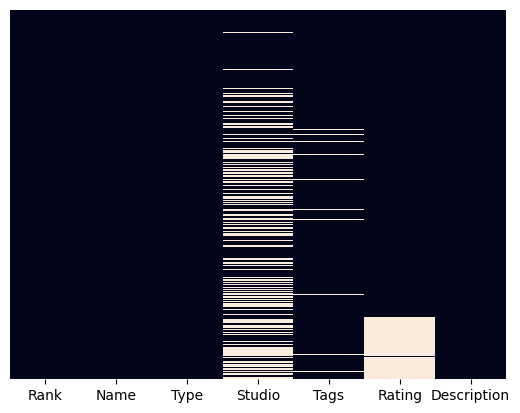

In [47]:
sns.heatmap(anime_df.isnull(), cbar= False, yticklabels= False)

# Cleaning the Data

To make the recommendations more relevant to the anime plotlines, filler content will be removed. Through some research, two categories will be dropped from Type feature. OVA content was kept because, although most are filler, some are plot related. It was felt safer to keep that data for now.

In [48]:
filler_content = anime_df[(anime_df['Type'] == 'Music') | (anime_df['Type'] == 'TV Sp')].index

In [49]:
anime_df.drop(filler_content, inplace = True)

The Studio column has too many missing values and would be difficult and time cinsuming to imputate, with accuracy, on which studio is associated with the anime. This column will be removed.

In [50]:
anime_df.drop('Studio', axis= 1, inplace= True)

<Axes: >

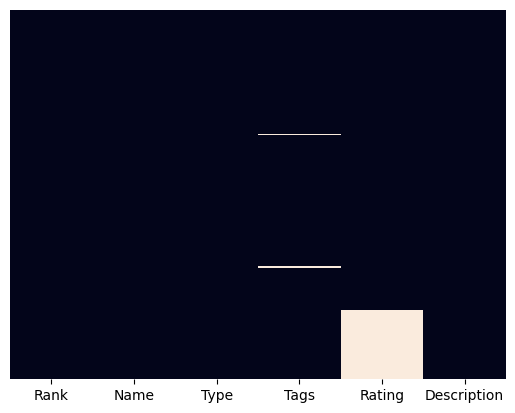

In [51]:
sns.heatmap(anime_df.isnull(), cbar= False, yticklabels= False)

In [52]:
anime_df.isnull().sum()

Rank              0
Name              0
Type              0
Tags             75
Rating         2927
Description       4
dtype: int64

Now to address the description column.

In [53]:
anime_df['Description'].tail()

18490    Special episodes of Qin Shi Mingyue: Canghai H...
18491                   No synopsis yet - check back soon!
18492                   No synopsis yet - check back soon!
18493                   No synopsis yet - check back soon!
18494                   No synopsis yet - check back soon!
Name: Description, dtype: object

### Cleaning Tags Data

To clean the Tags varaible, a look into its correlations will show if this is an important feature for the recommendation system.

In [54]:
# need to remove NaN values to use later function
filter_nulls = anime_df[(anime_df['Description'].isnull()) | (anime_df['Tags'].isnull())].index

In [55]:
anime_df.drop(filter_nulls, inplace= True)

In [56]:
anime_df.isnull().sum()

Rank              0
Name              0
Type              0
Tags              0
Rating         2915
Description       0
dtype: int64

In [57]:
anime_df['Tags Length'] = anime_df['Tags'].apply(len)

In [58]:
anime_data = anime_df.copy()

In [59]:
   anime_rating = anime_data.groupby('Rating').mean(numeric_only=True)

In [60]:
anime_rating.reset_index().corr()

AttributeError: 'Index' object has no attribute '_format_flat'

               Rating      Rank  Tags Length
Rating       1.000000 -0.932849     0.701483
Rank        -0.932849  1.000000    -0.709693
Tags Length  0.701483 -0.709693     1.000000

<Axes: >

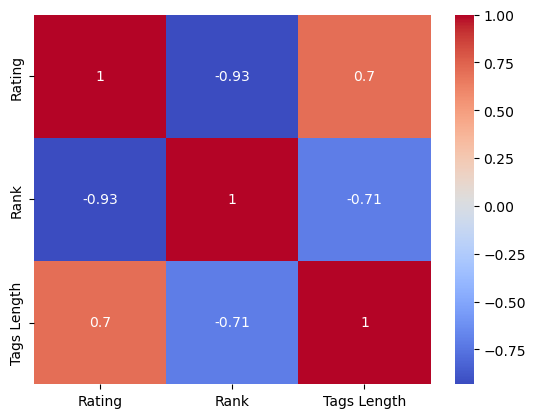

In [61]:
sns.heatmap(anime_rating.reset_index().corr(), cmap= 'coolwarm', annot= True)

Lets see the correlation when Rating is ungrouped.

In [62]:
    corr_anime_data = anime_data.corr(numeric_only=True)

<Axes: >

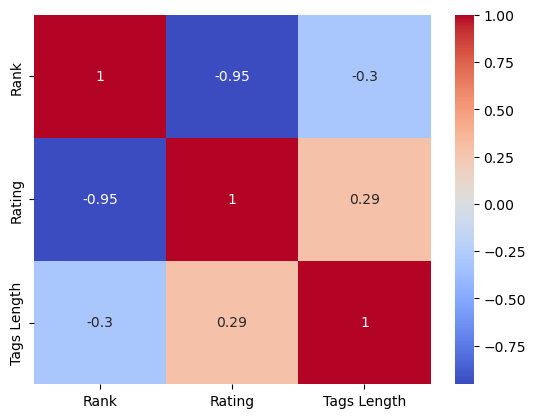

In [63]:
sns.heatmap(corr_anime_data, cmap= 'coolwarm', annot= True)

<Figure size 1200x600 with 0 Axes>

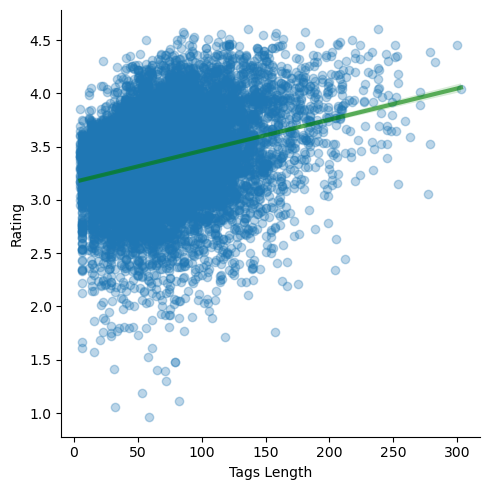

In [64]:

plt.figure(figsize= (12, 6))

#sns.jointplot(data= anime_data, x= 'Tags Length', y= 'Rating')
anime_plot = sns.lmplot(data= anime_data, x= 'Tags Length', y= 'Rating',
                       line_kws= {'lw': 3, 'color': 'green', 'alpha': 0.6},
                       scatter_kws= {'alpha': 0.3})
anime_plot.set_xlabels('Tags Length')
anime_plot.set_ylabels('Rating')

Since the correlations show an obvious relationship with Rank and Ratings and a weak relationship with Tags Length and Rating, let's finish cleaning the rest of our data for our recommender system.

### Cleaning up Remaining Data

Since Rating has a connection to Tags, imputatation on the nulls will be filled with the average rating.

In [65]:
col_mean = anime_df['Rating'].mean()

anime_df['Rating'].fillna(value= col_mean, inplace= True)

<Axes: >

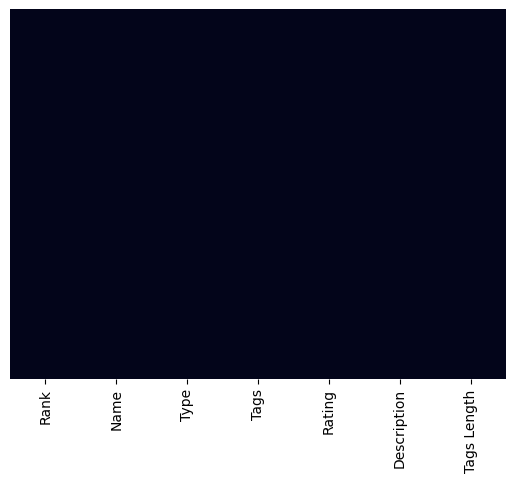

In [66]:
sns.heatmap(anime_df.isnull(), cbar= False, yticklabels= False)

In [67]:
anime_df.isnull().sum()

Rank           0
Name           0
Type           0
Tags           0
Rating         0
Description    0
Tags Length    0
dtype: int64

One last part needs cleaning. When the unique values were shown for the Type variable, trailing whitespaces were seen. These need to be handled to get a consistency and accuracy.

In [68]:
anime_df['Type'].unique()

array(['TV   ', 'Web  ', 'Movie', 'OVA  ', 'DVD S', 'Other'], dtype=object)

In [69]:
def space_remover(column):
    """
    1). Iterate through a column.
    2). For each value, split the string to then join them by the space and assign back to the column.
    3). return the column.
    """
    for text in column:
        column = ' '.join(column.split())
        # print(column)
    return column

In [70]:
anime_df['Type2'] = anime_df['Type'].apply(space_remover)

In [71]:
anime_df['Type2'].unique()

array(['TV', 'Web', 'Movie', 'OVA', 'DVD S', 'Other'], dtype=object)

In [72]:
anime_df = anime_df.drop('Type', axis= 1)

With our data clean, the last step is to clean up the Tags column to tokenize them for our recommender system.

In [73]:
import string
from nltk.corpus import stopwords

In [74]:
def text_cleanup(words):
    """
    1). Remove punctuation
    2). Remove stopwords
    3). Return list of clean text
    """
    
    nopunc = [char for char in words if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [75]:
# change Tags' strings to tokens
anime_df['Tags'].head().apply(text_cleanup)

0    [action, adventure, fantasy, shounen, demons, ...
1    [drama, fantasy, romance, shoujo, animal, tran...
2    [fantasy, ancient, china, chinese, animation, ...
3    [action, adventure, drama, fantasy, mystery, s...
4    [action, fantasy, horror, shounen, dark, fanta...
Name: Tags, dtype: object

In [76]:
anime_df.shape

(15568, 7)

Now that we have our function to create tokens, we can make our recommendation system

# Create the Text Vectors

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
covec = CountVectorizer(max_features= 15500, analyzer= text_cleanup)

In [79]:
covec.fit_transform(anime_df['Tags']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
covec.fit_transform(anime_df['Tags']).toarray().shape

(15568, 617)

In [81]:
print(covec.get_feature_names_out()[:15])

['15th' '16th' '17th' '18th' '19th' '2' '4koma' 'abstract' 'abuse'
 'acting' 'action' 'adult' 'adventure' 'africa' 'afterlife']


In [82]:
token_vectors = covec.fit_transform(anime_df['Tags']).toarray()

# Make the Recommendation System

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
text_similarity = cosine_similarity(token_vectors)

In [85]:
text_similarity

array([[1.        , 0.26568447, 0.16329932, ..., 0.        , 0.        ,
        0.        ],
       [0.26568447, 1.        , 0.16269784, ..., 0.        , 0.        ,
        0.        ],
       [0.16329932, 0.16269784, 1.        , ..., 0.25819889, 0.25819889,
        0.        ],
       ...,
       [0.        , 0.        , 0.25819889, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.25819889, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [86]:
text_similarity.shape

(15568, 15568)

In [87]:
df = pd.DataFrame(text_similarity, columns=anime_df['Name'], index=anime_df['Name']).reset_index()

df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

Name                                               Name  \
0     Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1                        Fruits Basket the Final Season   
2                                       Mo Dao Zu Shi 3   
3                      Fullmetal Alchemist: Brotherhood   
4                   Attack on Titan 3rd Season: Part II   

Name  Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc  \
0                                              1.000000             
1                                              0.265684             
2                                              0.163299             
3                                              0.430706             
4                                              0.473879             

Name  Fruits Basket the Final Season  Mo Dao Zu Shi 3  \
0                           0.265684         0.163299   
1                           1.000000         0.162698   
2                           0.162698         1.000000   
3 

In [105]:
input_anime = 'Steins;Gate'
recommendation = pd.DataFrame(df.nlargest(25, input_anime)[['Name', input_anime]])
recommender = recommendation[recommendation['Name'] != input_anime]
recommender['Rating'] = recommender['Name'].apply(lambda x: anime_df[anime_df['Name'] == x]['Rating'].values[0])
recommender['Tags'] = recommender['Name'].apply(lambda x: anime_df[anime_df['Name'] == x]['Tags'].values[0])
recommender['Top 3 Tags'] = recommender['Tags'].apply(lambda x: ', '.join(x.split(', ')[:3]))
recommender = recommender.sort_values(by='Rating', ascending=False)
print(recommender[['Name', 'Rating', 'Top 3 Tags']])

Name                                                Name    Rating  \
123      Fate/stay night: Heaven's Feel III. spring song  4.320000   
131            Steins;Gate Movie: Load Region of Deja Vu  4.310000   
146                 The Disappearance of Haruhi Suzumiya  4.300000   
167                                        Steins;Gate 0  4.280000   
374                                       86: Eighty-Six  4.160000   
480    Steins;Gate: Kyoukaimenjou no Missing Link - D...  4.120000   
959                                     Future Boy Conan  3.970000   
1568   The Garden of Sinners: Recalled Out Summer - E...  3.840000   
1781                             Serial Experiments Lain  3.810000   
2983             Higurashi no Naku Koro ni Kaku Outbreak  3.650000   
3772                    Higurashi: When They Cry - Sotsu  3.570000   
3791                             Gosenzo-sama Banbanzai!  3.570000   
3841                                              Maroko  3.570000   
5573                

# End